In [19]:
import matplotlib.pyplot as pl
import numpy as np
import skope
% matplotlib inline

In [2]:
star = skope.Target()

In [32]:
fpix, flux, ferr= star.GenerateLightCurve(12.,roll=1.,background_level=100., ncadences=1000)

100%|██████████| 1000/1000 [00:51<00:00, 21.20it/s]


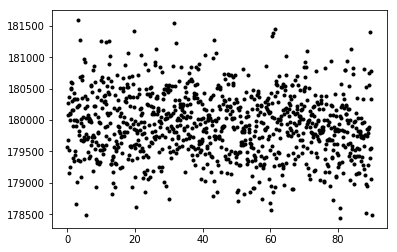

In [33]:
pl.plot(star.t,flux, 'k.')

In [34]:
ap = star.Aperture(fpix)

In [35]:
ap

array([[   nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,  0.673,  1.   ,  1.   ,  1.   ,  0.087,    nan],
       [ 0.027,  0.999,  1.   ,  1.   ,  1.   ,  0.976,    nan],
       [ 0.031,  1.   ,  1.   ,  1.   ,  1.   ,  0.997,  0.006],
       [   nan,  0.977,  1.   ,  1.   ,  1.   ,  0.93 ,    nan],
       [   nan,    nan,  1.   ,  1.   ,  0.948,  0.03 ,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan]])

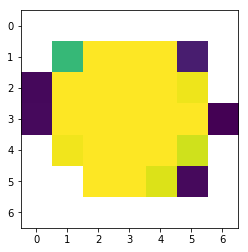

In [36]:
pl.imshow(ap)

In [37]:
det, detflux = star.Detrend(fpix)

> /Users/nks1994/Documents/Research/skope/skope/skopemath.py(262)PLD()
-> X1 = pca.fit_transform(f1)
(Pdb) c


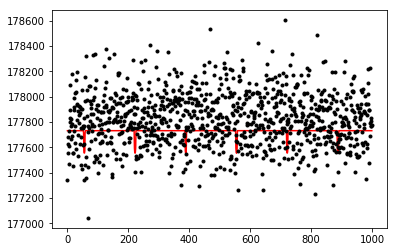

In [38]:
pl.plot(star.trn*np.mean(detflux),'r')
pl.plot(det,'k.')

In [22]:
fpix, flux = star.AddTransit(fpix)

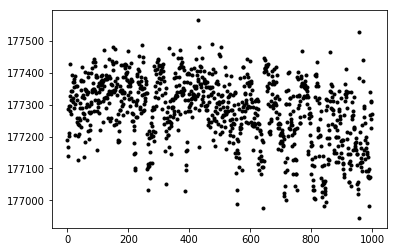

In [25]:
pl.plot(flux,'k.')

In [16]:
fpix, flux, ferr= star.GenerateLightCurve(11.,roll=5., background_level=100., apsize = 9)

100%|██████████| 1000/1000 [01:17<00:00, 12.92it/s]


In [20]:
ap = star.Aperture(fpix)

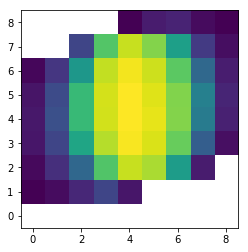

In [21]:
pl.imshow(ap,origin='lower')

In [22]:
det, raw = star.Detrend(fpix)

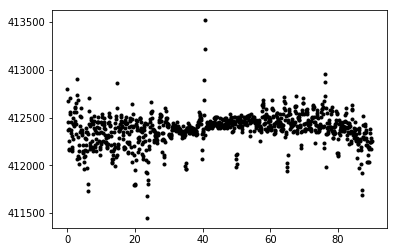

In [23]:
# pl.plot(star.t, raw, 'r.', alpha = 0.5)
pl.plot(star.t, det, 'k.')

In [24]:
trn, trnflux = star.AddTransit(fpix)

In [25]:
dettr, rawtr = star.Detrend(trn)

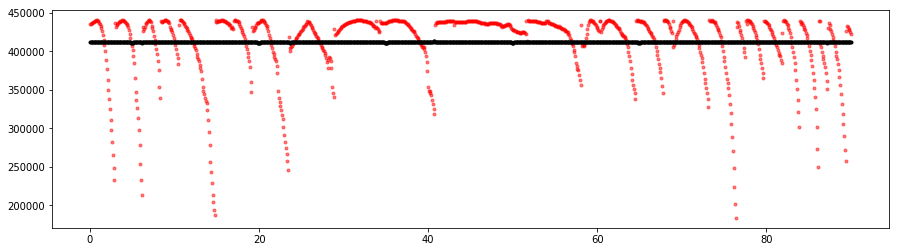

In [27]:
fig = pl.figure(figsize=(15,4))
pl.plot(star.t, rawtr, 'r.', alpha = 0.5)
pl.plot(star.t, star.trn*np.mean(dettr),'r')
pl.plot(star.t, dettr, 'k.')